# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.003
-0.003
0.0
-0.003
-0.003
-0.003
0.981
0.985
0.983
0.982
0.985
1.965
1.968
1.969
1.968
1.968
2.949
2.952
2.953
2.951
2.951
3.94
3.942
3.944
3.944
3.943
4.926
4.93
4.93
4.929
4.929
5.911
5.915
5.915
5.914
5.914
6.759
6.761
6.763
6.762
6.762
7.607
7.611
7.61
7.609
7.609
8.588
8.593
8.593
8.592
8.592
9.582
9.586
9.586
9.586
9.586
10.578
10.582
10.582
10.58
10.58
11.568
11.573
11.572
11.571
11.572
12.563
12.568
12.568
12.567
12.567
13.554
13.556
13.557
13.557
13.557
14.229
14.229
14.228
14.229
14.894
14.897
14.897
14.897
14.898
15.886
15.886
15.884
15.886
16.869
16.873
16.872
16.871
16.873
17.869
17.873
17.873
17.872
17.873
18.867
18.867
18.865
18.865
19.847
19.85
19.85
19.849
19.85
20.826
21.463
21.465
21.465
21.464
21.464
22.135
22.135
22.134
22.134
23.119
23.119
23.118
23.117
24.113
24.113
24.111
24.111
25.108
25.108
25.106
25.106
26.099
26.098
26.098
26.098
27.09
27.09
27.088
27.0

56.783
56.783
56.783
56.783
56.783
56.783
56.78
56.783
56.784
56.782
56.782
56.782
56.782
56.781
56.781
56.781
56.781
56.781
56.781
56.781
56.781
56.78
56.779
56.779
56.779
56.779
56.778
56.778
56.778
56.778
56.778
56.778
56.778
56.778
56.778
56.778
56.778
56.78
56.78
56.779
56.778
56.778
56.778
56.778
56.777
56.777
56.777
56.776
57.006
57.006
57.032
57.033
57.039
57.071
57.071
57.069
57.069
57.069
57.069
57.068
57.068
57.066
57.066
57.066
57.066
57.067
57.067
57.067
57.067
57.067
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.066
57.065
57.065
57.066
57.064
57.063
57.063
57.063
57.139
57.14
57.14
57.14
57.14
57.213
57.212
57.211
57.211
57.211
57.211
57.211
57.21
57.212
57.212
57.21
57.209
57.209
57.209
57.209
57.209
57.209
57.209
57.209
57.209
57.209
57.208
57.208
57.208
57.208
57.207
57.207
57.206
57.206
57.206
57.206
57.206
57.206
57.206
57.205
57.205
57.205
57.205
57.205
57.206
57.206
57.206
57.206
57.206
57.205
57.205
57.205
57.204
57

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1495,2990,59.728
1496,2992,59.728
1497,2994,59.727
1498,2996,59.728


<IPython.core.display.Javascript object>


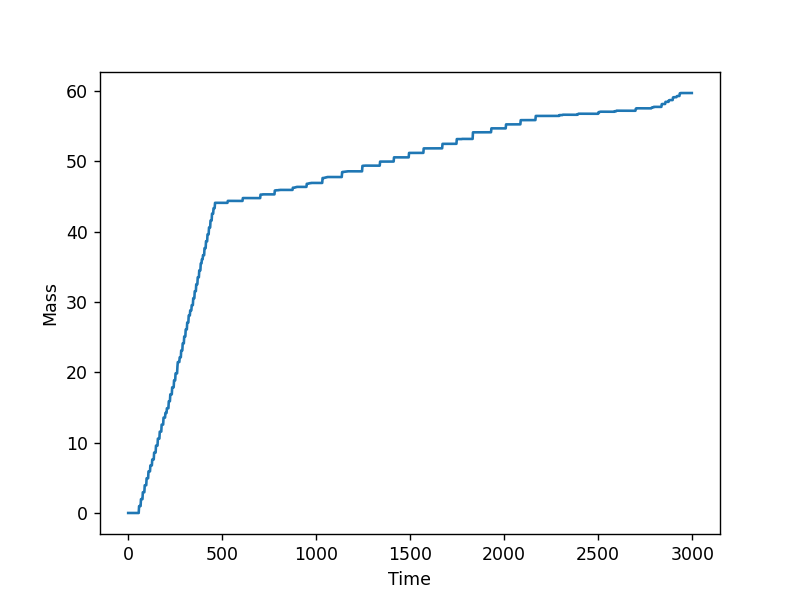

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_100523_S415-420.csv')